### parse the transcriptome-integrated ssGEMs simulation result
1. compare simulation results from different methods: GIMME vs GIMME_fc vs PNAS20 vs original
2. compare strain type classification effect of different methods
3. Machine learning classify strain types
4. Clustering analysis according to strain clades

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import umap
from sklearn.preprocessing import StandardScaler

# set working directory
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database_from_13pro\Unified_Yeast_GEMs_Database')


In [2]:
# load data
# tpm_data=pd.read_excel('code/7.transcriptomics_ssGEMs_analysis/output/sce969_transcriptome_tpmMatrix.xlsx',index_col=0)
df_gimme_fluxes=pd.read_excel('code/7.transcriptomics_ssGEMs_analysis/output/GIMME_ssGEMs_flux.xlsx',index_col=0)
# df_pnas20_fluxes=pd.read_excel('code/7.transcriptomics_ssGEMs_analysis/output/PNAS_ssGEMs_flux.xlsx',index_col=0)
df_pnas20v2_fluxes=pd.read_excel('code/7.transcriptomics_ssGEMs_analysis/output/PNAS_v2_ssGEMs_flux.xlsx',index_col=0)
df_ssGEM_fluxes=pd.read_excel('code/7.transcriptomics_ssGEMs_analysis/output/ssGEMs_flux.xlsx',index_col=0)
df_gimmefc_fluxes=pd.read_excel('code/7.transcriptomics_ssGEMs_analysis/output/GIMME_fc_ssGEMs_flux.xlsx',index_col=0)
df_pnas20v2_mean_fluxes=pd.read_excel('code/7.transcriptomics_ssGEMs_analysis/output/PNAS_v2_mean_ssGEMs_flux.xlsx',index_col=0)
df_pnas20v2_median_fluxes=pd.read_excel('code/7.transcriptomics_ssGEMs_analysis/output/PNAS_v2_median_ssGEMs_flux.xlsx',index_col=0)
df_pnas20v2_sample_fluxes=pd.read_excel('code/7.transcriptomics_ssGEMs_analysis/output/sample_pnasv2_flux.xlsx',index_col=0)
df_pnas20v3_fluxes=pd.read_csv('code/7.transcriptomics_ssGEMs_analysis/output/newmethod_tissGEMs_pfba_flux.csv',index_col=0)
df_pnas20v3_sample_fluxes=pd.read_csv('code/7.transcriptomics_ssGEMs_analysis/output/PNAS_v3_tissGEMs_sample_flux.csv',index_col=0)


#### 1. compare simulation result from different transcripteome intgrating methods

In [3]:
gimme_growth_values=df_gimme_fluxes.loc['growth',:]
# pnas20_growth_values=df_pnas20_fluxes.loc['growth',:]
pnas20v2_growth_values=df_pnas20v2_fluxes.loc['growth',:]
ssGEM_growth_values=df_ssGEM_fluxes.loc['growth',:]
gimmefc_growth_values=df_gimmefc_fluxes.loc['growth',:]
pnas20v2_mean_growth_values=df_pnas20v2_mean_fluxes.loc['growth',:]
pnas20v2_median_growth_values=df_pnas20v2_median_fluxes.loc['growth',:]
pnas20v2_sample_growth_values=df_pnas20v2_sample_fluxes.loc['r_2111',:]
pnas20v3_growth_values=df_pnas20v3_fluxes.loc['growth',:]
pnas20v3_sample_growth_values=df_pnas20v3_sample_fluxes.loc['r_2111',:]


# check 0 value number
print('gimme 0 value number:',len(gimme_growth_values[gimme_growth_values==0]))
# print('pnas20 0 value number:',len(pnas20_growth_values[pnas20_growth_values==0]))
print('ssGEM 0 value number:',len(ssGEM_growth_values[ssGEM_growth_values==0]))
print('gimmefc 0 value number:',len(gimmefc_growth_values[gimmefc_growth_values==0]))
print('pnas20v2 0 value number:',len(pnas20v2_growth_values[pnas20v2_growth_values==0]))
print('pnas20v2_mean 0 value number:',len(pnas20v2_mean_growth_values[pnas20v2_mean_growth_values==0]))
print('pnas20v2_median 0 value number:',len(pnas20v2_median_growth_values[pnas20v2_median_growth_values==0]))
print('pnas20v2_sample 0 value number:',len(pnas20v2_sample_growth_values[pnas20v2_sample_growth_values==0]))
print('pnas20v3 0 value number:',len(pnas20v3_growth_values[pnas20v3_growth_values==0]))
print('pnas20v3_sample 0 value number:',len(pnas20v3_sample_growth_values[pnas20v3_sample_growth_values==0]))


gimme 0 value number: 3
ssGEM 0 value number: 3
gimmefc 0 value number: 40
pnas20v2 0 value number: 57
pnas20v2_mean 0 value number: 55
pnas20v2_median 0 value number: 55
pnas20v2_sample 0 value number: 8
pnas20v3 0 value number: 53
pnas20v3_sample 0 value number: 19


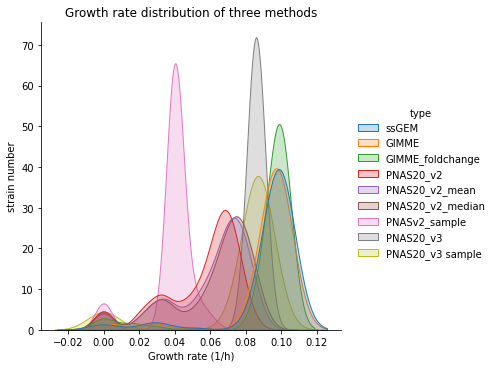

In [4]:
# combine all the growth rate values into one column
growth_values=pd.concat([ssGEM_growth_values,gimme_growth_values,gimmefc_growth_values,pnas20v2_growth_values,pnas20v2_mean_growth_values,pnas20v2_median_growth_values,pnas20v2_sample_growth_values,pnas20v3_growth_values,pnas20v3_sample_growth_values],axis=0)
growth_values=growth_values.reset_index()
growth_values['type']=['ssGEM']*len(ssGEM_growth_values)+['GIMME']*len(gimme_growth_values)+['GIMME_foldchange']*len(gimmefc_growth_values)+['PNAS20_v2']*len(pnas20v2_growth_values)+['PNAS20_v2_mean']*len(pnas20v2_mean_growth_values)+['PNAS20_v2_median']*len(pnas20v2_median_growth_values)+['PNASv2_sample']*len(pnas20v2_sample_growth_values)+['PNAS20_v3']*len(pnas20v3_growth_values)+['PNAS20_v3 sample']*len(pnas20v3_sample_growth_values)
growth_values.columns=['index','growth','type']
# compare the growth rate distribution of three methods
sns.displot(data=growth_values,x='growth',hue='type',fill=True,kind='kde',common_norm=False)
plt.xlabel('Growth rate (1/h)')
plt.ylabel('strain number')
plt.title('Growth rate distribution of three methods')
plt.show()

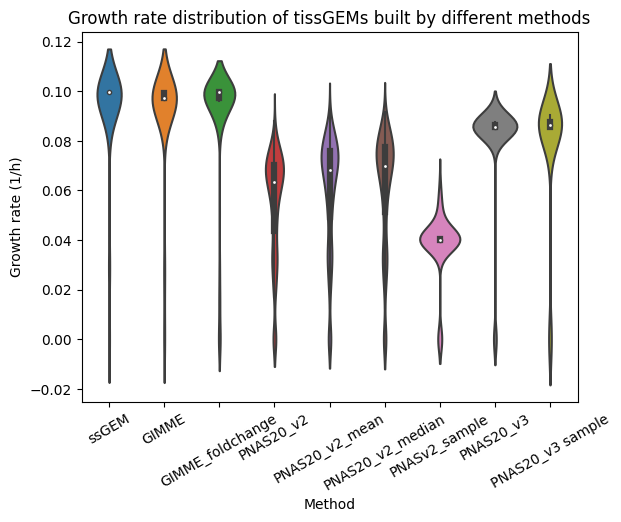

In [5]:
# plot violin plot to compare the growth rate distribution of GIMME and ssGEMs
sns.violinplot(data=growth_values,x='type',y='growth')
plt.xlabel('Method')
plt.ylabel('Growth rate (1/h)')
plt.title('Growth rate distribution of tissGEMs built by different methods')
# rotate x axis label
plt.xticks(rotation=30)
plt.show()

In [10]:
# umap clustering according to fluxome data
def umap_cluster(raw_data,emetric="euclidean",n_neighbors=15,min_dist=0.1,n_components=2):
    data = raw_data.iloc[:,:-1]
    data = pd.DataFrame(data, index=raw_data.index, columns=raw_data.columns[:-1])
    #UMAP降维
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, metric=emetric)
    embedding = reducer.fit_transform(data)
    embedding = pd.DataFrame(embedding, index=raw_data.index, columns=["UMAP1", "UMAP2"])
    embedding["label"]=raw_data["label"]
    # beautify the figure
    plt.figure(figsize=(8, 8))
    plt.style.use('ggplot')
    # set distinct color for each label
    sns.set_palette("Set1")
    sns.scatterplot(
        x="UMAP1", y="UMAP2",
        hue="label",
        data=embedding,
        legend="full",
        )
    # set legend outside
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    return embedding

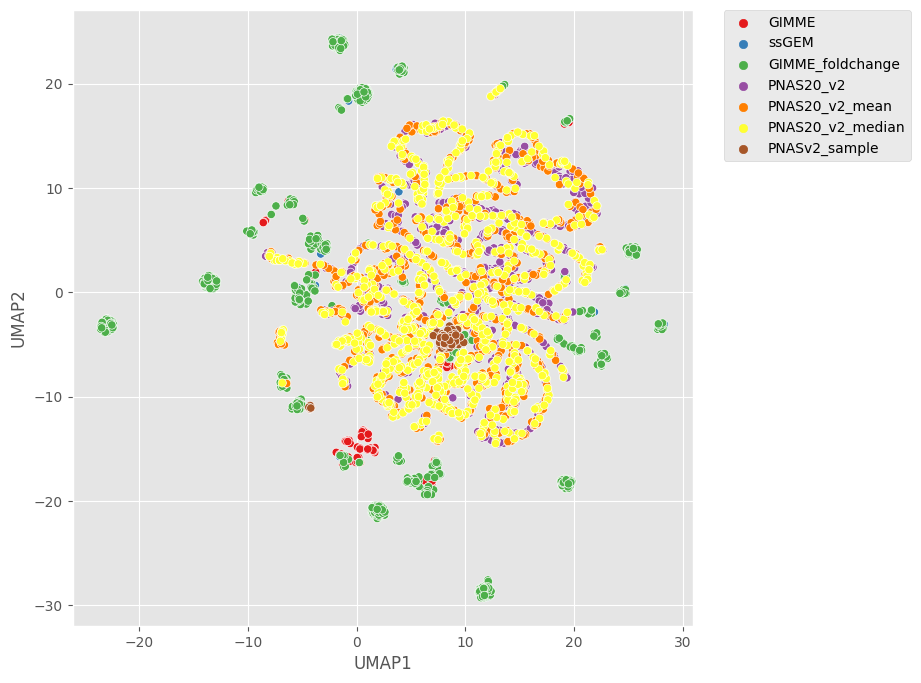

In [13]:
# remove 0 value in growth rate of df_pnas20v2_fluxes and df_pnas20_v2_mean_fluxes and df_pnas20v2_median_fluxes
df_pnas20v2_fluxes=df_pnas20v2_fluxes.loc[:,df_pnas20v2_fluxes.loc['growth',:]>0]
df_pnas20v2_mean_fluxes=df_pnas20v2_mean_fluxes.loc[:,df_pnas20v2_mean_fluxes.loc['growth',:]>0]
df_pnas20v2_median_fluxes=df_pnas20v2_median_fluxes.loc[:,df_pnas20v2_median_fluxes.loc['growth',:]>0]

# combine data
fluxome_data=pd.concat([df_gimme_fluxes,df_ssGEM_fluxes,df_gimmefc_fluxes,df_pnas20v2_fluxes,df_pnas20v2_mean_fluxes,df_pnas20v2_median_fluxes,df_pnas20v2_sample_fluxes],axis=1)
fluxome_data=fluxome_data.T
fluxome_data['label']=['GIMME']*len(df_gimme_fluxes.columns)+['ssGEM']*len(df_ssGEM_fluxes.columns)+['GIMME_foldchange']*len(df_gimmefc_fluxes.columns)+['PNAS20_v2']*len(df_pnas20v2_fluxes.columns)+['PNAS20_v2_mean']*len(df_pnas20v2_mean_fluxes.columns)+['PNAS20_v2_median']*len(df_pnas20v2_median_fluxes.columns)+['PNASv2_sample']*len(df_pnas20v2_sample_fluxes.columns)

fluxome_data.fillna(0,inplace=True)
# run umap
embedding=umap_cluster(raw_data=fluxome_data,emetric="chebyshev",n_neighbors=10,min_dist=0.9,n_components=2)



- conclusion:
    1. PNAS method showed a more various predicted growth rate.
    2. UMAP clustering according to fluxome data, transciptome-integrated ssGEM doesn't show a distinct difference with ssGEM
    

#### 2. strain type classification

In [7]:
# strain information
allstrain_info = pd.read_excel("data/1897_strains_info.xlsx",index_col=0)
# set genome_id as index
allstrain_info.set_index('genome_id',inplace=True)

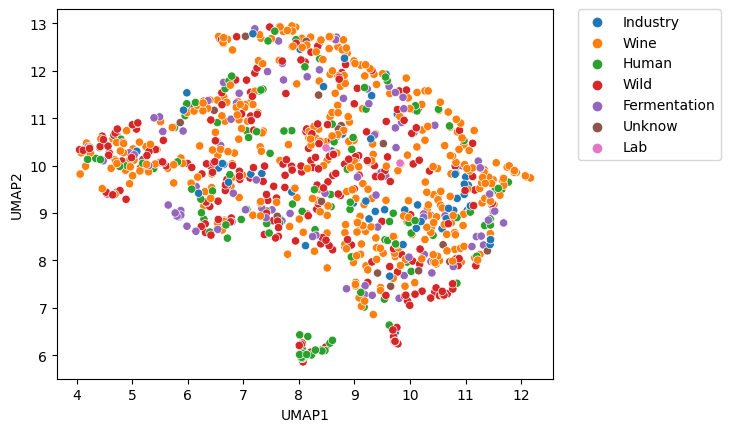

In [12]:
# df TPM data to run umap
df_tpm=tpm_data.T
# only keep the strains index in allstrain_info genome_id
df_tpm=df_tpm[df_tpm.index.isin(allstrain_info.index.tolist())]
# add strain  type
df_tpm['label']=df_tpm.index.map(lambda x:allstrain_info.loc[x,'type'])
# only keep Wild, Human and Industry type
# df_tpm=df_tpm[df_tpm['label'].isin(['Human','Wild','Industry'])]
gimme_umpa_result=umap_cluster(df_tpm)

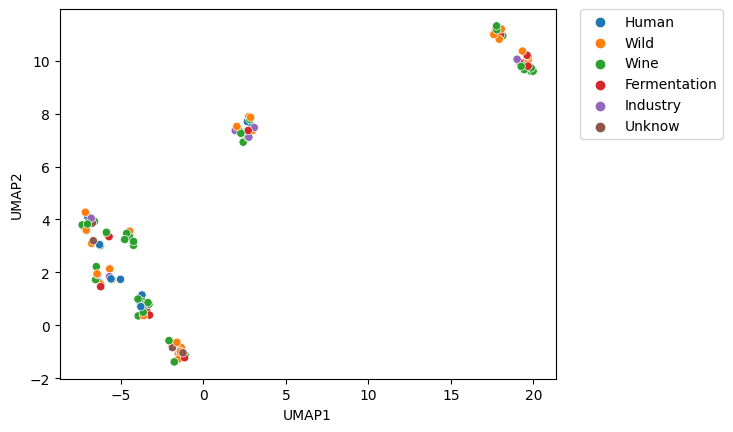

In [13]:
# GIMME fluxome data to run umap
flux_data=df_gimme_fluxes.T
# remove .xml in index
flux_data.index=[i.rstrip('.xml') for i in flux_data.index]
# add strain  type
flux_data['label']=flux_data.index.map(lambda x:allstrain_info.loc[x,'type'])
# only keep Wild, Human and Industry type
# flux_data=flux_data[flux_data['label'].isin(['Human','Wild','Industry'])]
gimme_umpa_result=umap_cluster(flux_data)

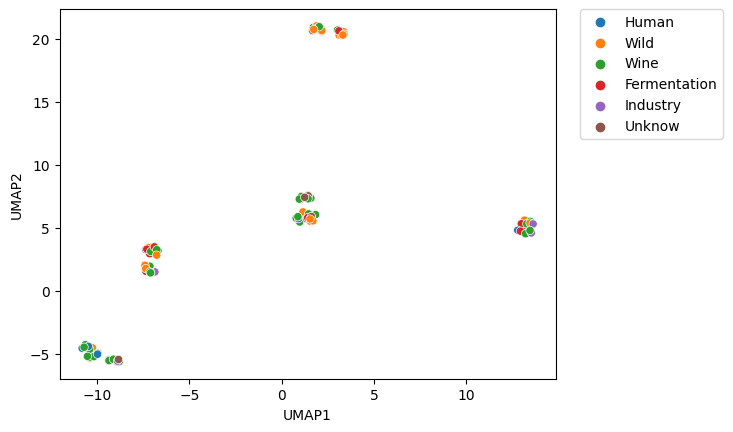

In [14]:
# pnas20 tissGEMs fluxome data to run umap
flux_data=df_pnas20_fluxes.T
# remove .xml in index
flux_data.index=[i.rstrip('.xml') for i in flux_data.index]
# add strain  type
flux_data['label']=flux_data.index.map(lambda x:allstrain_info.loc[x,'type'])
# flux_data=flux_data[flux_data['label'].isin(['Wild','Human','Industry','Wine'])]
pnas20_umpa_result=umap_cluster(flux_data)

['Beer' 'Sake' 'Wine' 0 'Distillery' 'Bakery' 'Human' 'Soil' 'Wild'
 'Dairy' 'Fermentation' 'Cider' 'Industrial' 'Insect' 'Bioethanol' 'Lab']


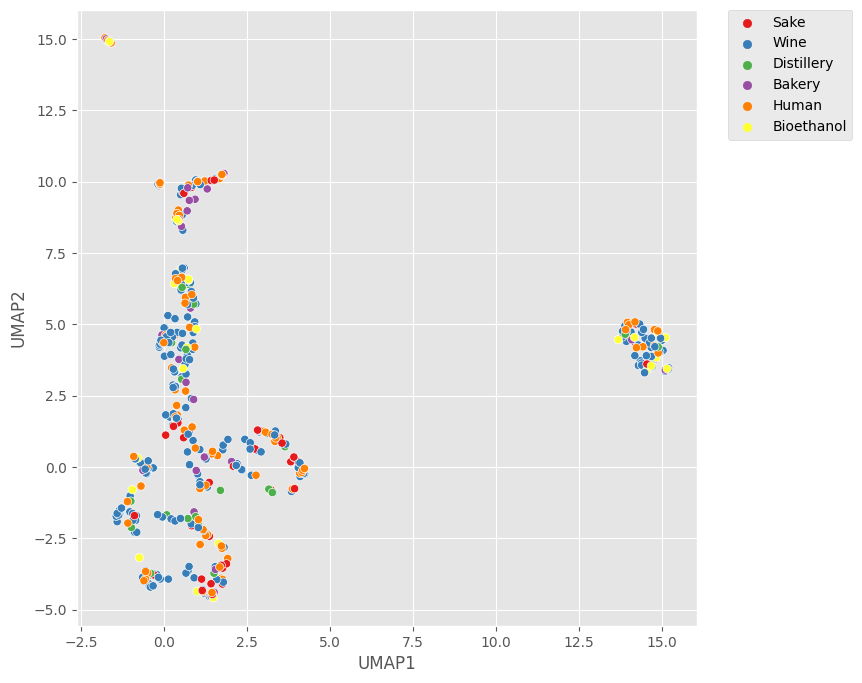

In [61]:
# PNAS20_v2 tissGEMs fluxome data to run umap
flux_data=df_pnas20v2_fluxes.T
# remove .xml in index
flux_data.index=[i.rstrip('.xml') for i in flux_data.index]
# add strain  type
flux_data['label']=flux_data.index.map(lambda x:allstrain_info.loc[x,'sub_type'])
# print all kinds of sub_type
print(flux_data['label'].unique())
to_keep_sub_type=['Sake','Wine','Distillery','Bakery','Human','Bioethanol']
flux_data=flux_data[flux_data['label'].isin(to_keep_sub_type)]
pnas20v2_umpa_result=umap_cluster(flux_data)


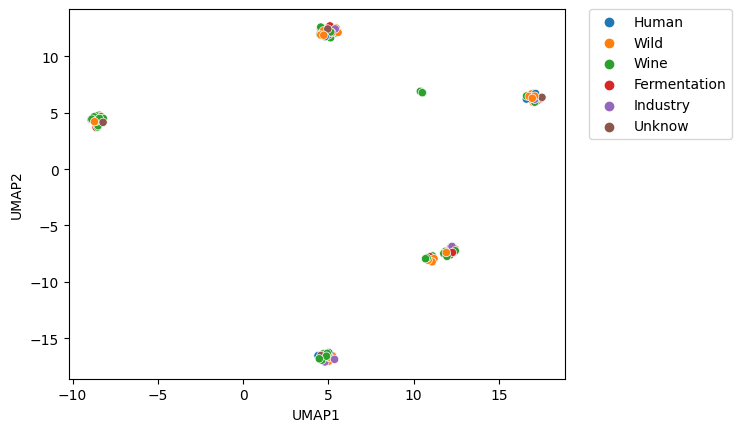

In [15]:
# original ssGEMs fluxome data to run umap
flux_data=df_ssGEM_fluxes.T
# remove .xml in index
flux_data.index=[i.rstrip('.xml') for i in flux_data.index]
# add strain  type
flux_data['label']=flux_data.index.map(lambda x:allstrain_info.loc[x,'type'])
# flux_data=flux_data[flux_data['label'].isin(['Human','Wild'])]
original_umpa_result=umap_cluster(flux_data)

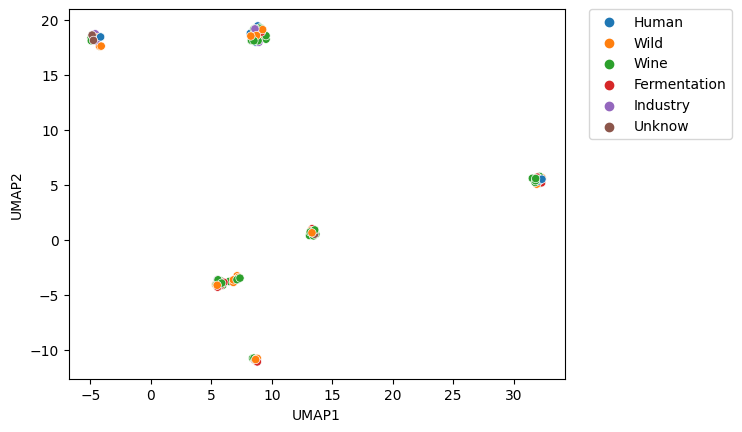

In [23]:
# GIMME_foldchange fluxome data to run umap
flux_data=df_gimmefc_fluxes.T
# remove .xml in index
flux_data.index=[i.rstrip('.xml') for i in flux_data.index]
# add strain  type
flux_data['label']=flux_data.index.map(lambda x:allstrain_info.loc[x,'type'])
# flux_data=flux_data[flux_data['label'].isin(['Human','Wild'])]
original_umpa_result=umap_cluster(flux_data)

#### 3. machine learning classify strain type


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# use PNAS 20 tissGEMs fluxome data to predict strain type
# pnas20 tissGEMs fluxome data to run umap
flux_data=df_pnas20v2_fluxes.T
# remove .xml in index
flux_data.index=[i.rstrip('.xml') for i in flux_data.index]
# add strain  type
flux_data['label']=flux_data.index.map(lambda x:allstrain_info.loc[x,'type'])
flux_data=flux_data[flux_data['label'].isin(['Wild','Human','Industry','Wine'])]

In [13]:
label=flux_data['label']
flux_data.drop('label',axis=1,inplace=True)
# split data into train and test
train_data, test_data, train_lable, test_lable = train_test_split(
    flux_data,
    label,
    random_state=1,
    train_size=0.8,
    test_size=0.2,
)
gnb = GaussianNB()
gnb.fit(train_data, train_lable)
pre_train = gnb.predict(train_data)
pre_test = gnb.predict(test_data)
train_acc = accuracy_score(train_lable, pre_train)
test_acc = accuracy_score(test_lable, pre_test)
print("train accuracy: ", train_acc)
print("test accuracy: ", test_acc)

train accuracy:  0.17200674536256325
test accuracy:  0.16778523489932887


In [16]:
# use random forest to predict strain type
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=100, random_state=90)
rfc = rfc.fit(flux_data, label)
# do cross validation
score_pre = cross_val_score(rfc, flux_data , label, cv=5)
print("cross validation score: ", score_pre)


cross validation score:  [0.47651007 0.41610738 0.32432432 0.50675676 0.48648649]


#### 4. Clustering analysis for different strain clades by UMAP

In [8]:
allstrain_info.head()

,strain,source,original_ecological_description,geographic_origin,Ploidy,type,sub_type,lg_classify,assemble_level,genomeSize,contigNums,N50,gene_numb,remove,nature_clade
genome_id,,,,,,,,,,,,,,,
BFC_3.re,EXF-5295,1011_nature,Fermentation,Slovenia,2,Fermentation,Fermentation,Fermentation,contig,11830106.0,1534.0,203532.0,6380.0,False,1. Wine/European
AGL_2.re,CBS4458,1011_nature,Wine,France,1,Wine,Wine,Wine,contig,12043831.0,4846.0,141324.0,6280.0,False,1. Wine/European
ABE_5.re,YJM434_1b,1011_nature,"Human, clinical",0,1,Human,Human,"Human, clinical",contig,12024093.0,4239.0,165966.0,6353.0,False,1. Wine/European
YAM.re,YJM453,1011_nature,"Human, clinical",0,2,Unknow,0,NaN,contig,11826830.0,1674.0,122940.0,6385.0,False,1. Wine/European
BKI_2.re,DBVPG1554,1011_nature,Wine,Dalmatia,2,Wine,Wine,Wine,contig,11761442.0,1477.0,221563.0,6370.0,False,1. Wine/European


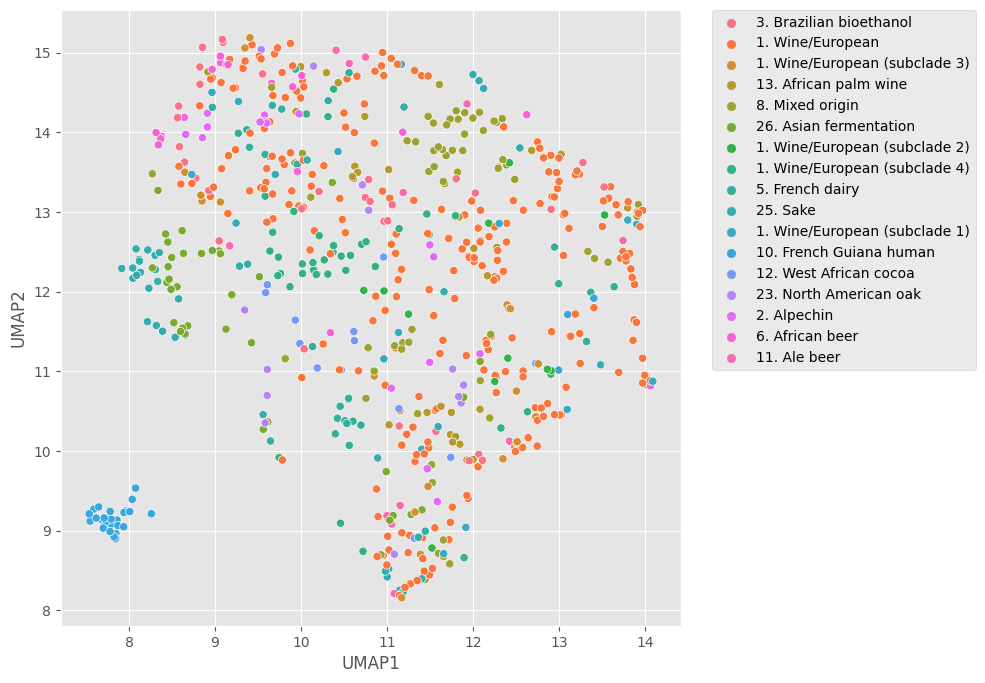

['1. Wine/European ', '8. Mixed origin ', '25. Sake ', '26. Asian fermentation ', '1. Wine/European (subclade 4)', '3. Brazilian bioethanol ', '10. French Guiana human ', '13. African palm wine ', '5. French dairy ', '1. Wine/European (subclade 3)', '1. Wine/European (subclade 1)', '6. African beer ', '2. Alpechin ', '1. Wine/European (subclade 2)', '12. West African cocoa ', '23. North American oak ', '11. Ale beer ']


In [71]:
# df TPM data to run umap
df_tpm=tpm_data.T
# only keep the strains index in allstrain_info genome_id
df_tpm=df_tpm[df_tpm.index.isin(allstrain_info.index.tolist())]
# add strain  type
df_tpm['label']=df_tpm.index.map(lambda x:allstrain_info.loc[x,'nature_clade'])
# check the number of each type, and only keep the type with more than 10 strains
clades_to_keep=df_tpm['label'].value_counts()[df_tpm['label'].value_counts()>10].index.tolist()
# remove clades with Mosaic in name
clades_to_keep=[i for i in clades_to_keep if 'Mosaic' not in i]
df_tpm=df_tpm[df_tpm['label'].isin(clades_to_keep)]
tpm_umpa_result=umap_cluster(df_tpm)
print(clades_to_keep)

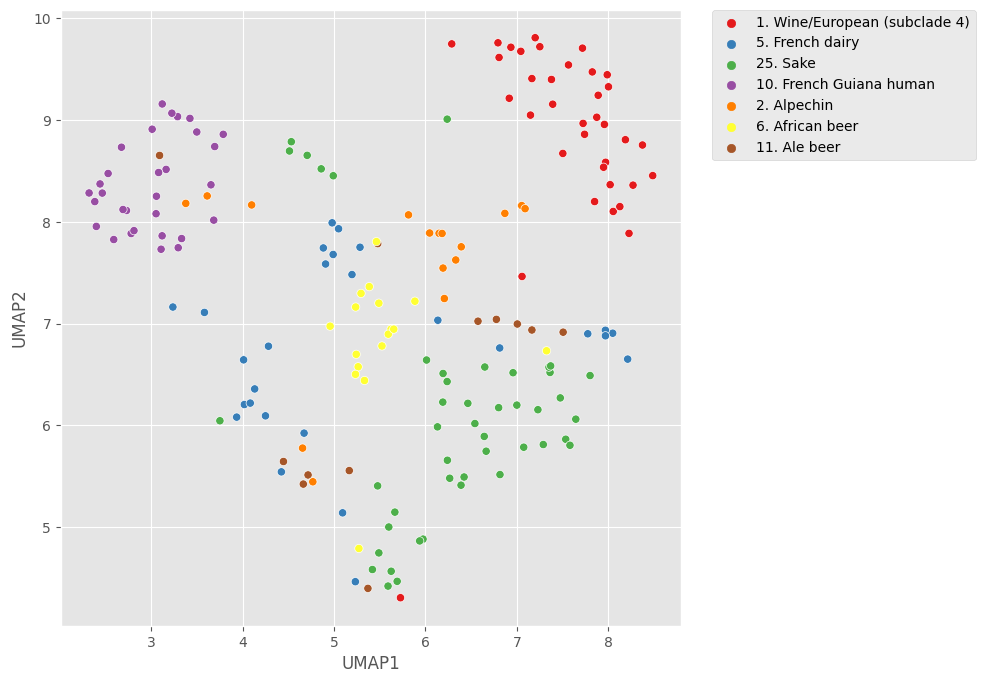

In [83]:
keep_clades=['1. Wine/European (subclade 4)','2. Alpechin ', '10. French Guiana human ','5. French dairy ','25. Sake ','6. African beer ','11. Ale beer ']
df_tpm2=df_tpm[df_tpm['label'].isin(keep_clades)]
tpm_umpa_result=umap_cluster(df_tpm2)

In [64]:
# use geneMatrix/cnvMatrix to run umap
# load data
df_geneMatrix=pd.read_csv('data/geneMatrix/pan1800_v2_blastp_50_70_geneMatrix.csv',index_col=0)
df_cnvMatrix=pd.read_csv('data/geneMatrix/pan1800_v2_blastp_50_70_cnvMatrix.csv',index_col=0)

# remove .fa in column name
df_geneMatrix.columns=[i.rstrip('.fa') for i in df_geneMatrix.columns]
df_cnvMatrix.columns=[i.rstrip('.fa') for i in df_cnvMatrix.columns]

# only keep the strain which included in tpm_data column
df_geneMatrix=df_geneMatrix[df_geneMatrix.columns.intersection(tpm_data.columns)]
df_cnvMatrix=df_cnvMatrix[df_cnvMatrix.columns.intersection(tpm_data.columns)]
df_geneMatrix.head()


,AAA_6.re,AAB_6.re,AAD_6.re,AAE_6.re,AAG_6.re,AAH_6.re,AAI_6.re,AAK_6.re,AAL_3.re,AAM_3.re,...,YCV.re,YDB.re,YDC.re,YDD.re,YDE.re,YDF.re,YDH.re,YDI.re,YDJ.re,YDK.re
YAL001C,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
YAL002W,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
YAL003W,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
YAL004W,0,0,0,1,0,0,1,1,1,0,...,1,0,0,1,1,0,0,0,0,0
YAL008W,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


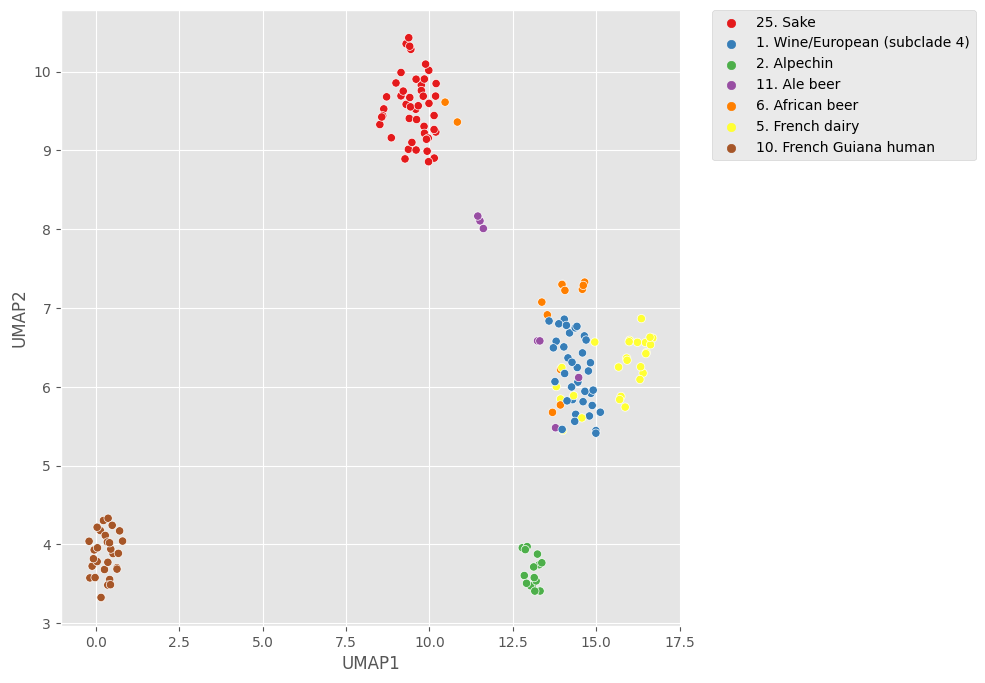

In [84]:
# geneMatrix to run umap
df_matrix=df_geneMatrix.T

# add clade label
df_matrix['label']=df_matrix.index.map(lambda x:allstrain_info.loc[x,'nature_clade'])
# check the number of each type, and only keep the type with more than 10 strains
clades_to_keep=df_matrix['label'].value_counts()[df_matrix['label'].value_counts()>10].index.tolist()
# remove clades with Mosaic in name
clades_to_keep=[i for i in clades_to_keep if 'Mosaic' not in i]
clades_to_keep=['1. Wine/European (subclade 4)','2. Alpechin ', '10. French Guiana human ','5. French dairy ','25. Sake ','6. African beer ','11. Ale beer ']
df_matrix=df_matrix[df_matrix['label'].isin(clades_to_keep)]
geneMatrix_umpa_result=umap_cluster(df_matrix)

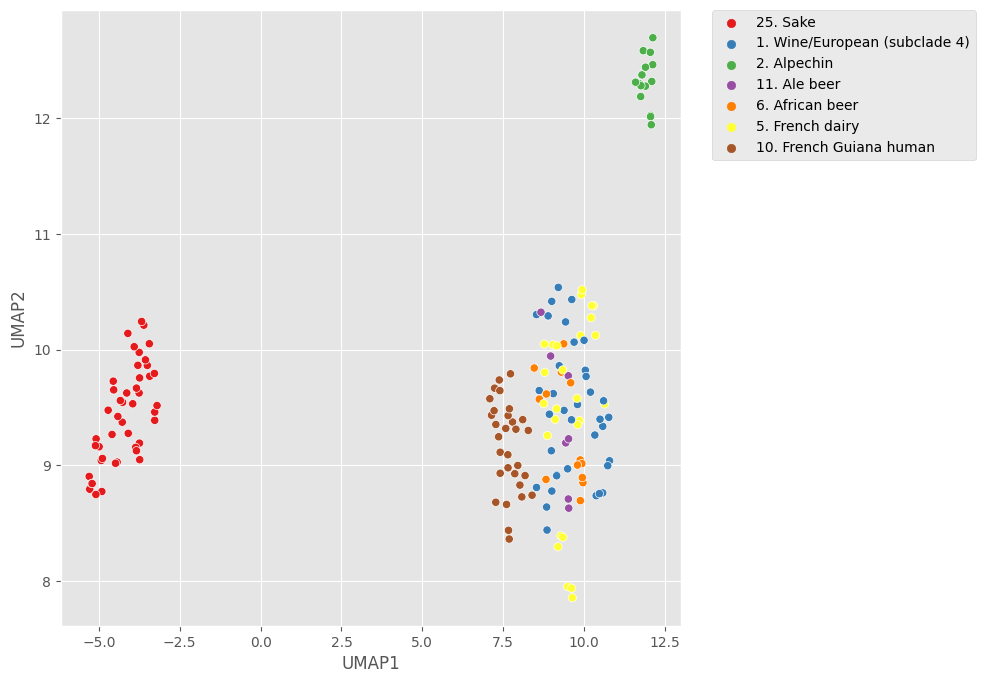

In [85]:
# cnvMatrix to run umap
df_matrix=df_cnvMatrix.T
# add clade label
df_matrix['label']=df_matrix.index.map(lambda x:allstrain_info.loc[x,'nature_clade'])
# check the number of each type, and only keep the type with more than 10 strains
clades_to_keep=df_matrix['label'].value_counts()[df_matrix['label'].value_counts()>10].index.tolist()
# remove clades with Mosaic in name
clades_to_keep=[i for i in clades_to_keep if 'Mosaic' not in i]
clades_to_keep=['1. Wine/European (subclade 4)','2. Alpechin ', '10. French Guiana human ','5. French dairy ','25. Sake ','6. African beer ','11. Ale beer ']
df_matrix=df_matrix[df_matrix['label'].isin(clades_to_keep)]
cnvMatrix_umpa_result=umap_cluster(df_matrix)

d:\softwares\programming\anoconda\envs\why\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


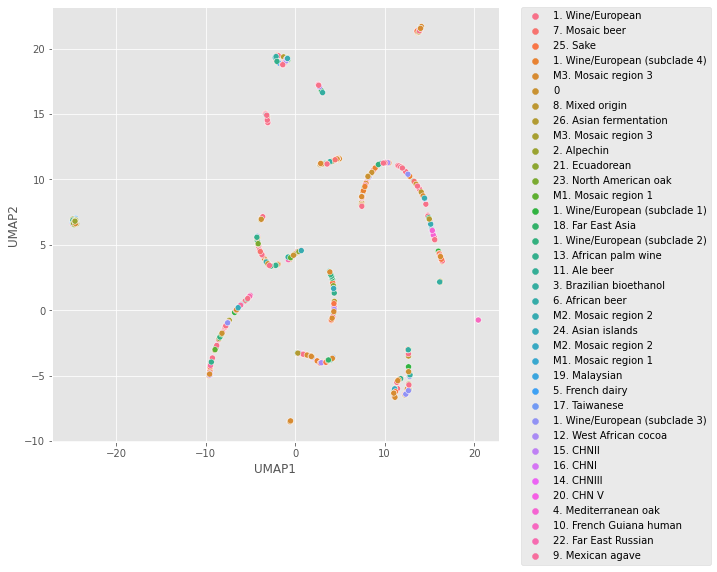

In [12]:
# pnas20_v2 fluxome data to run umap
flux_data=df_pnas20v2_fluxes.T
# nomorlize flux data by divide the growth value for each row
flux_data=flux_data.div(flux_data['growth'], axis=0)
# remove .xml in index
flux_data.index=[i.rstrip('.xml') for i in flux_data.index]
# add clade type
flux_data['label']=flux_data.index.map(lambda x:allstrain_info.loc[x,'nature_clade'])
flux_data.fillna(0,inplace=True)
# check the number of each type, and only keep the type with more than 10 strains
flux_data['label'].value_counts()[flux_data['label'].value_counts()>10].index.tolist()
# clades_to_keep=['1. Wine/European (subclade 4)','2. Alpechin ', '10. French Guiana human ','5. French dairy ','25. Sake ','6. African beer ','11. Ale beer ']
# wildtypelist=['14. CHNIII ','20. CHN V ', '15. CHNII ','17. Taiwanese ', '24. Asian islands ', '18. Far East Asia ', '19. Malaysian ', '22. Far East Russian ']
# # clades_to_keep=['6. African beer ','11. Ale beer ']
# flux_data=flux_data[flux_data['label'].isin(clades_to_keep+wildtypelist)]
# # label the wildtype
# flux_data['label']=flux_data['label'].map(lambda x: 'wildtype' if x in wildtypelist else x)
pnas20v2_umpa_result=umap_cluster(flux_data)

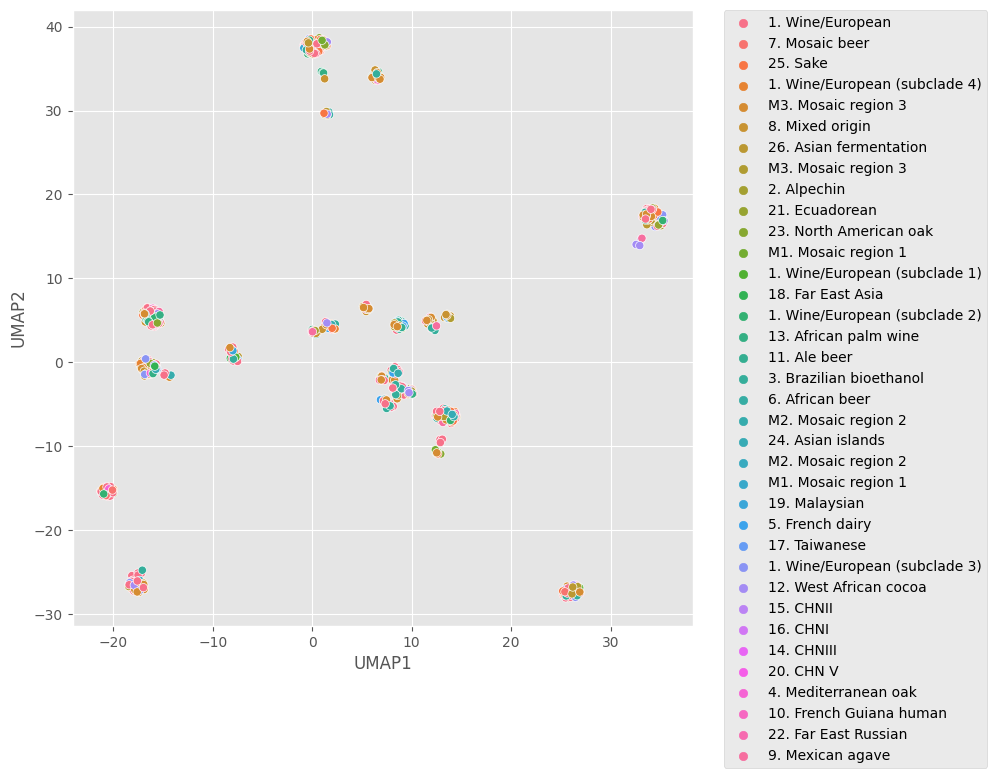

In [17]:
# GIMME fc fluxome data to run umap
flux_data=df_gimmefc_fluxes.T
# remove .xml in index
flux_data.index=[i.rstrip('.xml') for i in flux_data.index]
# add clade type
flux_data['label']=flux_data.index.map(lambda x:allstrain_info.loc[x,'nature_clade'])
# check the number of each type, and only keep the type with more than 10 strains
clades_to_keep=flux_data['label'].value_counts()[flux_data['label'].value_counts()>3].index.tolist()
# remove clades with Mosaic in name
# clades_to_keep=[i for i in clades_to_keep if 'Mosaic' not in i]
# clades_to_keep=['1. Wine/European (subclade 4)','2. Alpechin ', '10. French Guiana human ','5. French dairy ','25. Sake ','6. African beer ','11. Ale beer ']

# flux_data=flux_data[flux_data['label'].isin(clades_to_keep)]
gimme_umpa_result=umap_cluster(flux_data,emetric='euclidean',n_neighbors=50,min_dist=0.8)

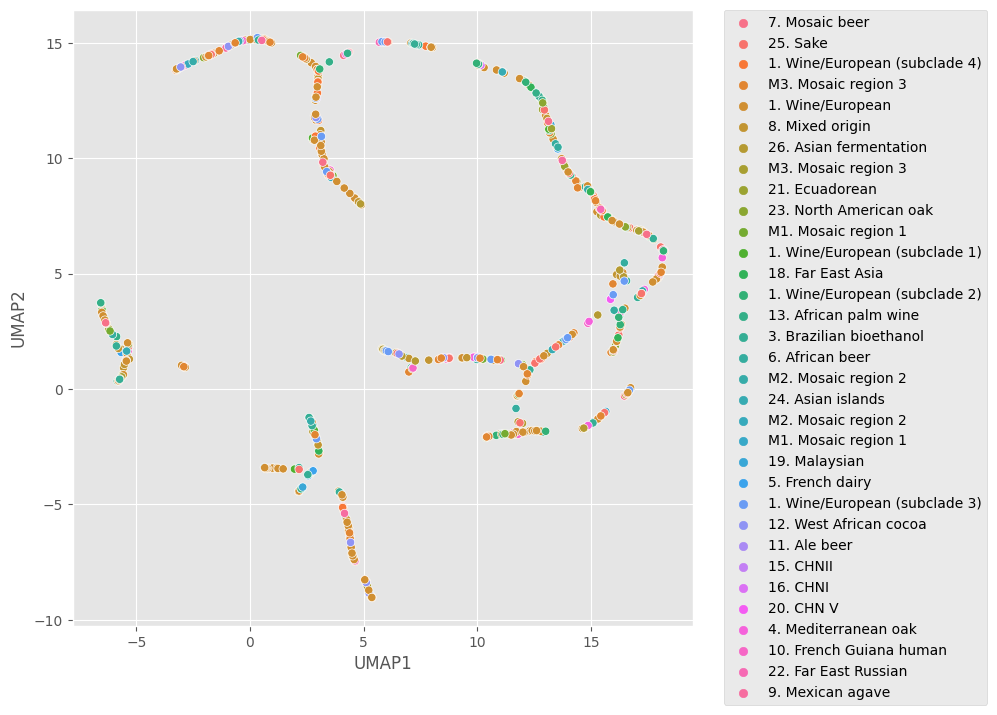

In [20]:
# df_pnas20v2_mean_fluxes to run umap
flux_data=df_pnas20v2_mean_fluxes.T
# remove .xml in index
flux_data.index=[i.rstrip('.xml') for i in flux_data.index]
# add clade type
flux_data['label']=flux_data.index.map(lambda x:allstrain_info.loc[x,'nature_clade'])
# check the number of each type, and only keep the type with more than 10 strains
clades_to_keep=flux_data['label'].value_counts()[flux_data['label'].value_counts()>3].index.tolist()
# remove clades with Mosaic in name
# clades_to_keep=[i for i in clades_to_keep if 'Mosaic' not in i]
# clades_to_keep=['1. Wine/European (subclade 4)','2. Alpechin ', '10. French Guiana human ','5. French dairy ','25. Sake ','6. African beer ','11. Ale beer ']
# flux_data=flux_data[flux_data['label'].isin(clades_to_keep)]
pnas20v2_mean_umpa_result=umap_cluster(flux_data,emetric='euclidean',n_neighbors=10,min_dist=0.1)

d:\softwares\programming\anoconda\envs\why\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\softwares\programming\anoconda\envs\why\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


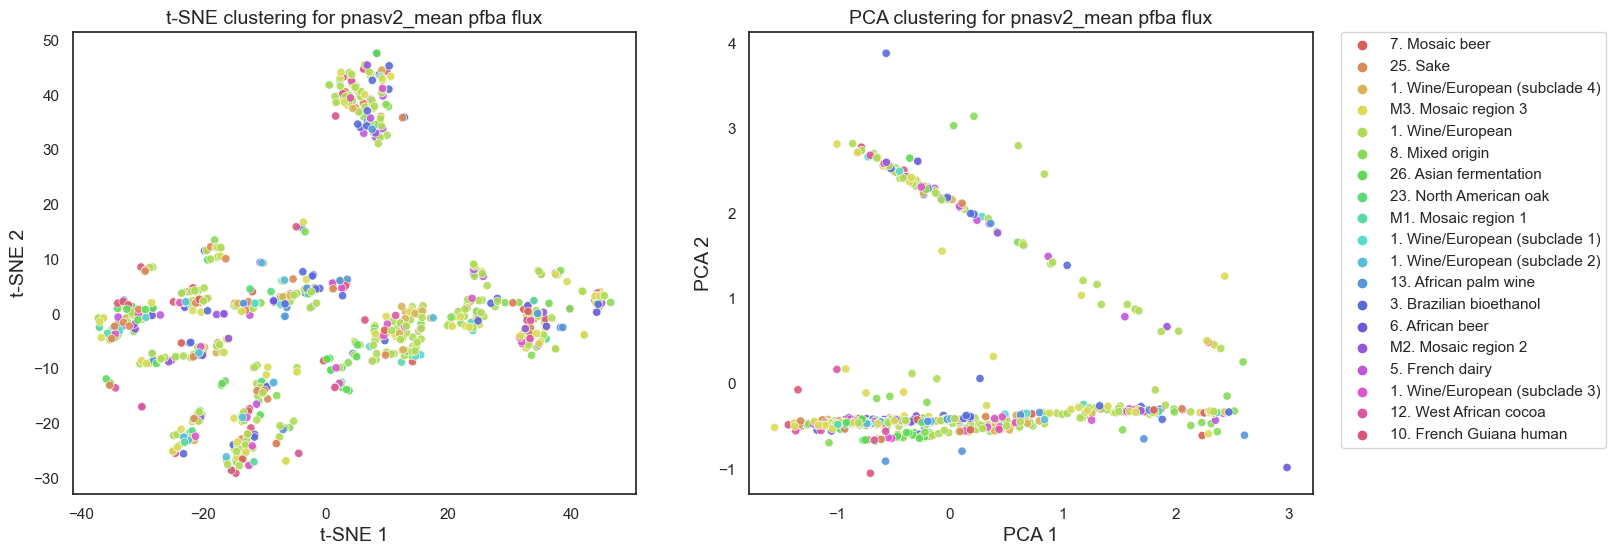

In [40]:
# df_pnas20v2_mean_fluxes clustering by t-SNE
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

flux_data=df_pnas20v2_mean_fluxes.T
# remove .xml in index
flux_data.index=[i.rstrip('.xml') for i in flux_data.index]
# add clade type
flux_data['label']=flux_data.index.map(lambda x:allstrain_info.loc[x,'nature_clade'])
# check the number of each type, and only keep the type with more than 10 strains
clades_to_keep=flux_data['label'].value_counts()[flux_data['label'].value_counts()>10].index.tolist()
flux_data=flux_data[flux_data['label'].isin(clades_to_keep)]

# run t-SNE
X = flux_data.drop('label',axis=1)
X_std = StandardScaler().fit_transform(X)
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(X_std)

# run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_std)
pca_result = StandardScaler().fit_transform(pca_result)

# plot to compare t-SNE and PCA
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
sns.scatterplot(
    x=tsne_result[:,0], y=tsne_result[:,1],
    hue=flux_data['label'],
    palette=sns.color_palette("hls", len(flux_data['label'].unique())),
    alpha=0.9,
    ax=ax[0]
)
# do not show the legend
ax[0].get_legend().remove()
ax[0].set_xlabel('t-SNE 1', fontsize=14)
ax[0].set_ylabel('t-SNE 2', fontsize=14)
ax[0].set_title('t-SNE clustering for pnasv2_mean pfba flux', fontsize=14)
sns.scatterplot(
    x=pca_result[:,0], y=pca_result[:,1],
    hue=flux_data['label'],
    palette=sns.color_palette("hls", len(flux_data['label'].unique())),
    alpha=0.9,
    ax=ax[1]
)
# set legend outside the plot
ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax[1].set_xlabel('PCA 1', fontsize=14)
ax[1].set_ylabel('PCA 2', fontsize=14)
ax[1].set_title('PCA clustering for pnasv2_mean pfba flux', fontsize=14)
plt.show()

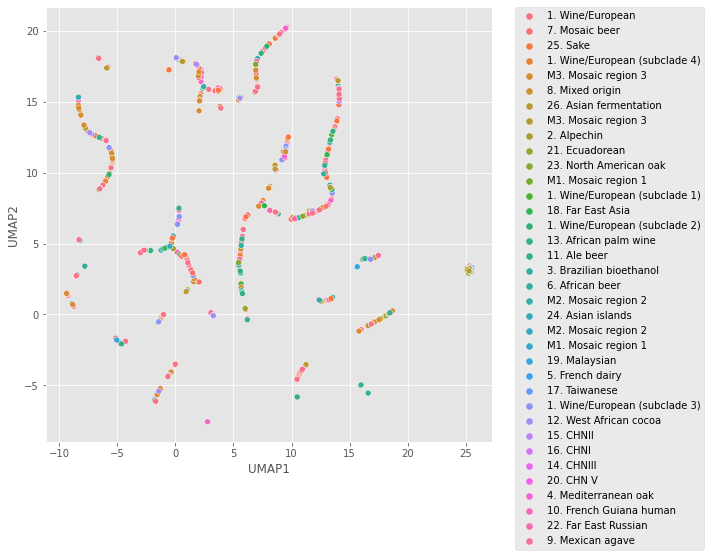

In [13]:
# df_pnas20v2_median_fluxes to run umap
flux_data=df_pnas20v2_median_fluxes.T
# remove .xml in index
flux_data.index=[i.rstrip('.xml') for i in flux_data.index]
# add clade type
flux_data['label']=flux_data.index.map(lambda x:allstrain_info.loc[x,'nature_clade'])
# check the number of each type, and only keep the type with more than 10 strains
clades_to_keep=flux_data['label'].value_counts()[flux_data['label'].value_counts()>3].index.tolist()
# remove clades with Mosaic in name
# clades_to_keep=[i for i in clades_to_keep if 'Mosaic' not in i]
# clades_to_keep=['1. Wine/European (subclade 4)','2. Alpechin ', '10. French Guiana human ','5. French dairy ','25. Sake ','6. African beer ','11. Ale beer ']

# flux_data=flux_data[flux_data['label'].isin(clades_to_keep)]
pnas20v2_median_umpa_result=umap_cluster(flux_data,emetric='euclidean',n_neighbors=5,min_dist=0.1)

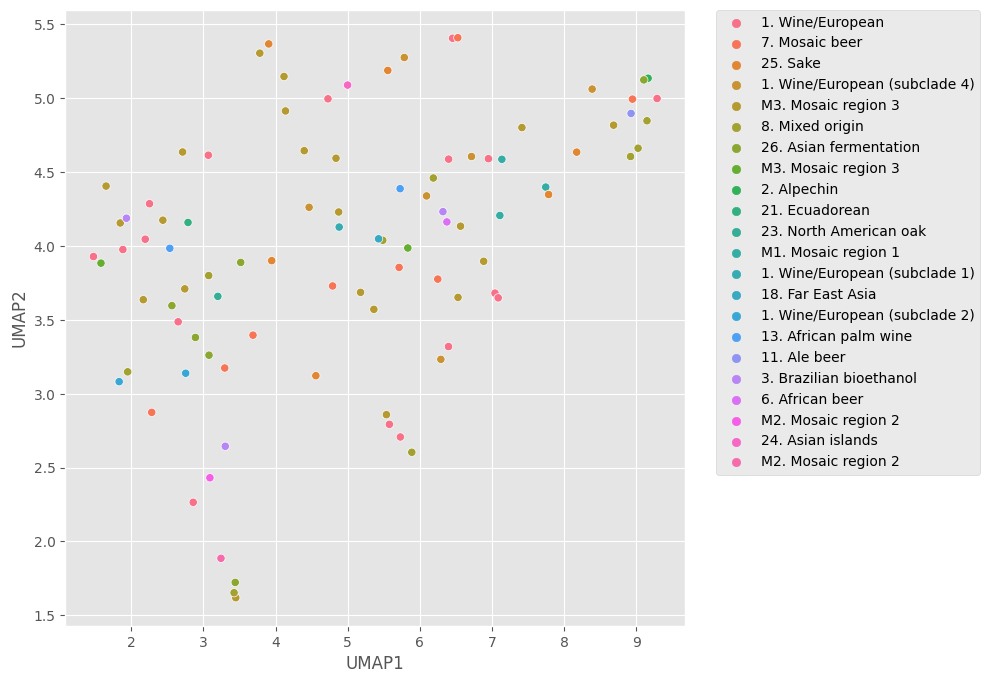

In [11]:
# df_pnas20v2_sample_fluxes to run umap
flux_data=df_pnas20v2_sample_fluxes.T
# remove .xml in index
flux_data.index=[i.rstrip('.xml') for i in flux_data.index]
# add clade type
flux_data['label']=flux_data.index.map(lambda x:allstrain_info.loc[x,'nature_clade'])
# check the number of each type, and only keep the type with more than 10 strains
clades_to_keep=flux_data['label'].value_counts()[flux_data['label'].value_counts()>3].index.tolist()
# remove clades with Mosaic in name
# clades_to_keep=[i for i in clades_to_keep if 'Mosaic' not in i]
# clades_to_keep=['1. Wine/European (subclade 4)','2. Alpechin ', '10. French Guiana human ','5. French dairy ','25. Sake ','6. African beer ','11. Ale beer ']

# flux_data=flux_data[flux_data['label'].isin(clades_to_keep)]
pnas20v2_sample_umpa_result=umap_cluster(flux_data,emetric='euclidean',n_neighbors=5,min_dist=0.1)

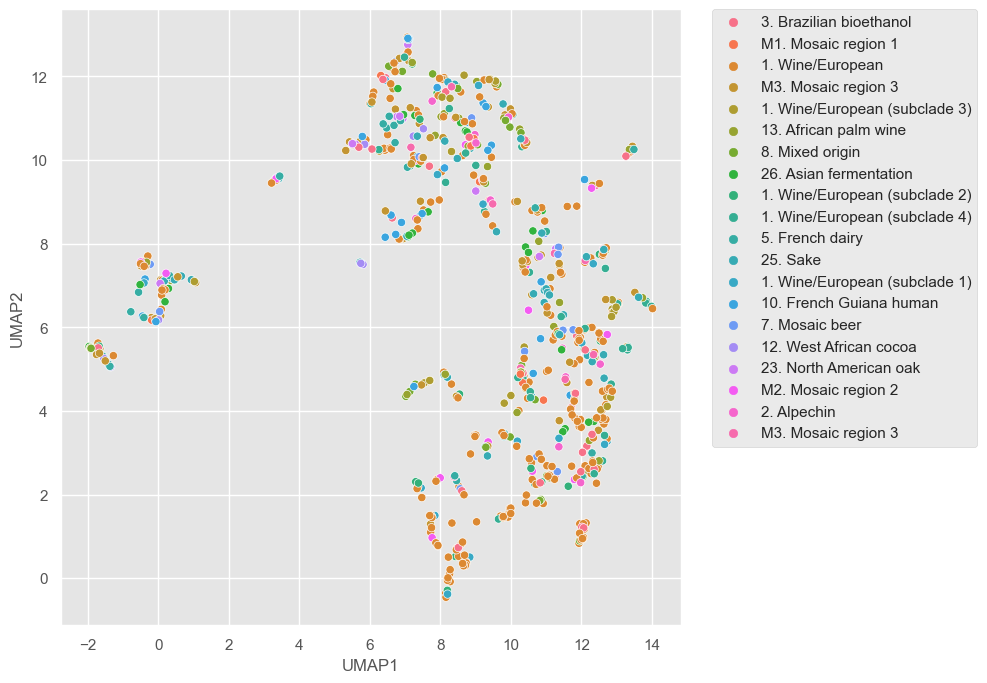

In [70]:
# df_pnas20v3_fluxes to run umap
flux_data=df_pnas20v3_fluxes.T
# remove .xml in index
flux_data.index=[i.rstrip('.xml') for i in flux_data.index]
# remove strain with 0 growth rate
flux_data=flux_data[flux_data['growth']!=0]
# fill na with 0
flux_data=flux_data.fillna(0)
# add clade type
flux_data['label']=flux_data.index.map(lambda x:allstrain_info.loc[x,'nature_clade'])
# check the number of each type, and only keep the type with more than 10 strains
clades_to_keep=flux_data['label'].value_counts()[flux_data['label'].value_counts()>10].index.tolist()
# remove clades with Mosaic in name
# clades_to_keep=[i for i in clades_to_keep if 'Mosaic' not in i]
# clades_to_keep=['1. Wine/European (subclade 4)','2. Alpechin ', '10. French Guiana human ','5. French dairy ','25. Sake ','6. African beer ','11. Ale beer ']
flux_data=flux_data[flux_data['label'].isin(clades_to_keep)]

# flux_data=flux_data[flux_data['label'].isin(clades_to_keep)]
pnas20v3_umpa_result=umap_cluster(flux_data,emetric='chebyshev',n_neighbors=5,min_dist=0.1)

d:\softwares\programming\anoconda\envs\why\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\softwares\programming\anoconda\envs\why\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


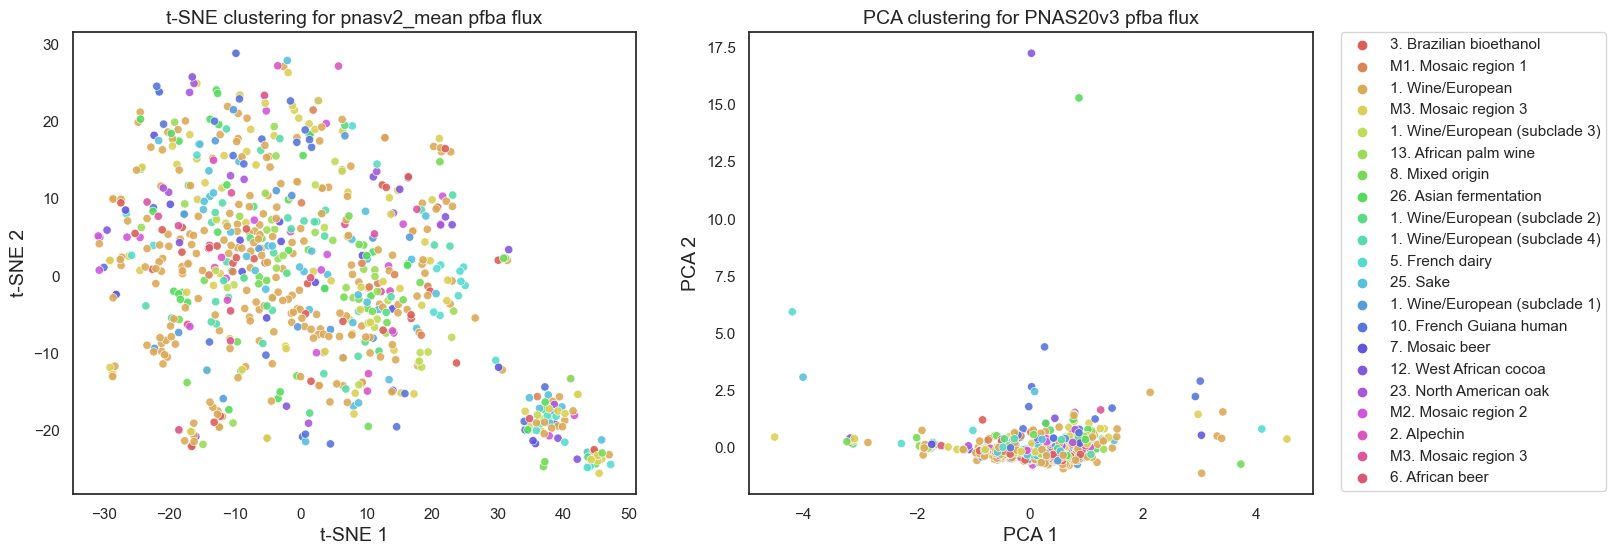

In [68]:
# df_pnas20v3_fluxes cluster with t-SNE and PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

flux_data=df_pnas20v3_fluxes.T
# remove .xml in index
flux_data.index=[i.rstrip('.xml') for i in flux_data.index]
# add clade type
flux_data['label']=flux_data.index.map(lambda x:allstrain_info.loc[x,'nature_clade'])
# check the number of each type, and only keep the type with more than 10 strains
clades_to_keep=flux_data['label'].value_counts()[flux_data['label'].value_counts()>10].index.tolist()
flux_data=flux_data[flux_data['label'].isin(clades_to_keep)]
# remove strains with growth rate 0
flux_data=flux_data[flux_data['growth']!=0]
# fill na with 0
flux_data=flux_data.fillna(0)

# run t-SNE
X = flux_data.drop('label',axis=1)
X_std = StandardScaler().fit_transform(X)
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(X_std)

# run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_std)
pca_result = StandardScaler().fit_transform(pca_result)

# plot to compare t-SNE and PCA
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
sns.scatterplot(
    x=tsne_result[:,0], y=tsne_result[:,1],
    hue=flux_data['label'],
    palette=sns.color_palette("hls", len(flux_data['label'].unique())),
    alpha=0.9,
    ax=ax[0]
)
# do not show the legend
ax[0].get_legend().remove()
ax[0].set_xlabel('t-SNE 1', fontsize=14)
ax[0].set_ylabel('t-SNE 2', fontsize=14)
ax[0].set_title('t-SNE clustering for pnasv2_mean pfba flux', fontsize=14)
sns.scatterplot(
    x=pca_result[:,0], y=pca_result[:,1],
    hue=flux_data['label'],
    palette=sns.color_palette("hls", len(flux_data['label'].unique())),
    alpha=0.9,
    ax=ax[1]
)
# set legend outside the plot
ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax[1].set_xlabel('PCA 1', fontsize=14)
ax[1].set_ylabel('PCA 2', fontsize=14)
ax[1].set_title('PCA clustering for PNAS20v3 pfba flux', fontsize=14)
plt.show()

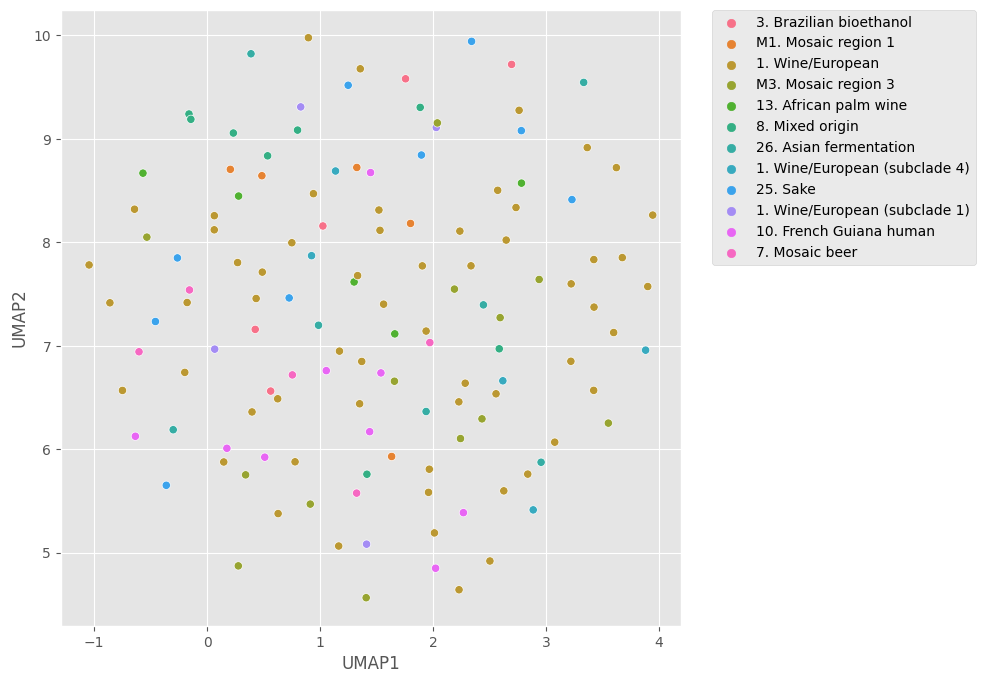

In [17]:
# df_pnas20v3_sample_fluxes to run umap
flux_data=df_pnas20v3_sample_fluxes.T
# remove .xml in index
flux_data.index=[i.rstrip('.xml') for i in flux_data.index]
# add clade type
flux_data['label']=flux_data.index.map(lambda x:allstrain_info.loc[x,'nature_clade'])
# check the number of each type, and only keep the type with more than 10 strains
clades_to_keep=flux_data['label'].value_counts()[flux_data['label'].value_counts()>3].index.tolist()
flux_data=flux_data[flux_data['label'].isin(clades_to_keep)]
# remove strains with growth rate 0
flux_data=flux_data[flux_data['growth']!=0]
# fill na with 0
flux_data=flux_data.fillna(0)

# run umap
pnas20v3_sample_umpa_result=umap_cluster(flux_data,emetric='euclidean',n_neighbors=50,min_dist=0.5)

In [ ]:
# compare growth values differnece among different clades
# remove .xml in index
pnas20v2_growth_values.index=[i.rstrip('.xml') for i in pnas20v2_growth_values.index]
# convert the series to dataframe
df_pnas20v2_growth_values=pd.DataFrame(pnas20v2_growth_values)
# add clade type
df_pnas20v2_growth_values['label']=df_pnas20v2_growth_values.index.map(lambda x:allstrain_info.loc[x,'nature_clade'])
# remove row with nan
df_pnas20v2_growth_values=df_pnas20v2_growth_values.dropna()

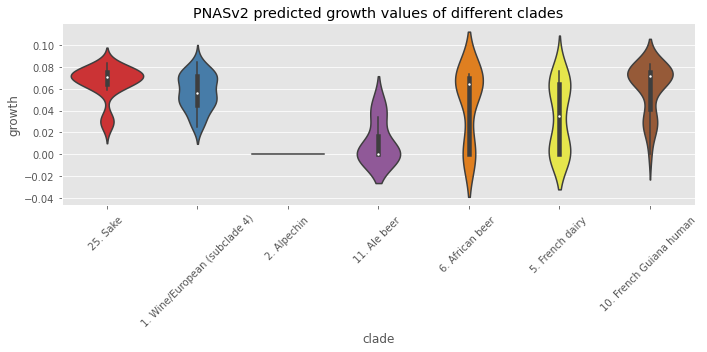

In [23]:
growth_data=df_pnas20v2_growth_values
clades_to_keep=['1. Wine/European (subclade 4)','2. Alpechin ', '10. French Guiana human ','5. French dairy ','25. Sake ','6. African beer ','11. Ale beer ']
growth_data=growth_data[growth_data['label'].isin(clades_to_keep)]
# plot violin plot of growth values
fig,ax=plt.subplots(figsize=(10,5))
# growth values 
sns.violinplot(x='label',y='growth',data=growth_data,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel('clade')
ax.set_ylabel('growth')
ax.set_title('PNASv2 predicted growth values of different clades')
plt.tight_layout()
plt.show()

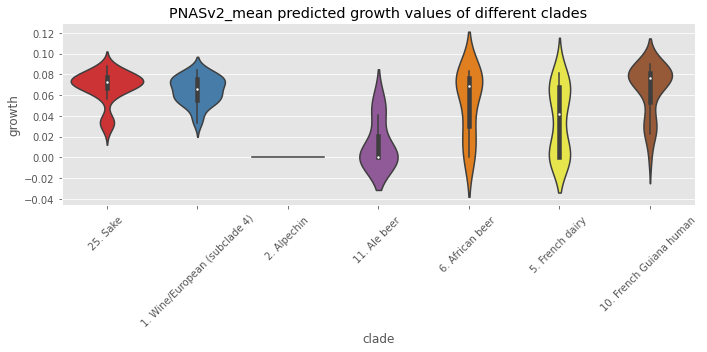

In [17]:
# compare growth values differnece among different clades
# remove .xml in index
pnas20v2_mean_growth_values.index=[i.rstrip('.xml') for i in pnas20v2_mean_growth_values.index]
# convert the series to dataframe
df_pnas20v2_mean_growth_values=pd.DataFrame(pnas20v2_mean_growth_values)
# add clade type
df_pnas20v2_mean_growth_values['label']=df_pnas20v2_mean_growth_values.index.map(lambda x:allstrain_info.loc[x,'nature_clade'])
# remove row with nan
df_pnas20v2_mean_growth_values=df_pnas20v2_mean_growth_values.dropna()
growth_data=df_pnas20v2_mean_growth_values
clades_to_keep=['1. Wine/European (subclade 4)','2. Alpechin ', '10. French Guiana human ','5. French dairy ','25. Sake ','6. African beer ','11. Ale beer ']
growth_data=growth_data[growth_data['label'].isin(clades_to_keep)]
# plot violin plot of growth values
fig,ax=plt.subplots(figsize=(10,5))
# growth values 
sns.violinplot(x='label',y='growth',data=growth_data,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_xlabel('clade')
ax.set_ylabel('growth')
# rotate xticklabels
ax.set_title('PNASv2_mean predicted growth values of different clades')
plt.tight_layout()
plt.show()